In [1]:
import pickle
import matplotlib.pyplot as plt
from coffea import hist
import numpy as np



/tmp/ipykernel_933/3064636608.py:11: RuntimeWarning: invalid value encountered in true_divide
  y=Max['reweighting'].integrate("dataset").values()[()]/Xbb['reweighting'].integrate("dataset").values()[()]


In [131]:
vals

SyntaxError: invalid syntax (3228087422.py, line 1)

/tmp/ipykernel_933/3932811155.py:2: RuntimeWarning: invalid value encountered in true_divide
  vals = Max["reweighting"].integrate("dataset").values()[()]/Xbb["reweighting"].integrate("dataset").values()[()]
/tmp/ipykernel_933/3932811155.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(("0","50","100","150","250","400","600",""))


[[0.         0.         0.        ]
 [0.         1.         1.        ]
 [0.         1.         1.        ]
 [0.         1.         1.        ]
 [0.         1.27551262 1.06621951]
 [0.         1.         1.        ]
 [0.         1.         1.        ]]
(7, 3)
[[  1.04302393  80.40900849   1.00320152]
 [  1.45036694  13.86908551   1.44055358]
 [  9.99524715  11.2825615    8.23915572]
 [  9.30769231  11.57452251   8.48387921]
 [100.83333333 134.55261989  74.51257412]
 [  2.46153846   2.43266613   2.39979518]
 [  2.875        3.369074     3.32751637]]
(7, 3)


/tmp/ipykernel_933/3932811155.py:2: RuntimeWarning: divide by zero encountered in true_divide
  vals = Max["reweighting"].integrate("dataset").values()[()]/Xbb["reweighting"].integrate("dataset").values()[()]


[[ 1.0940993   1.84346461  6.91975247]
 [ 5.37968504  3.8642644  13.26699022]
 [ 5.28397566  4.80359073  8.46075666]
 [ 5.67816092  2.22543823 13.18729872]
 [ 0.99706745  2.76941922  2.06061281]
 [ 1.          2.76357691  1.02227325]
 [-1.          6.27907451  4.85791269]]
(7, 3)


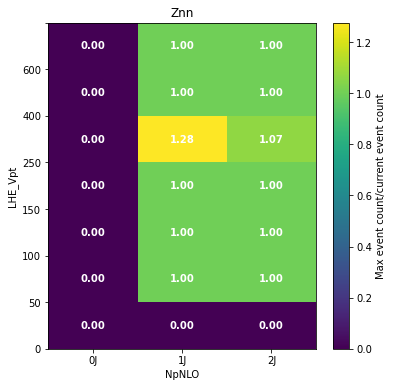

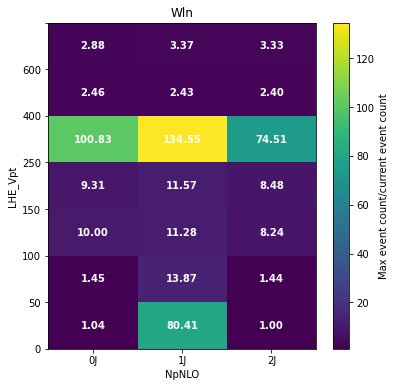

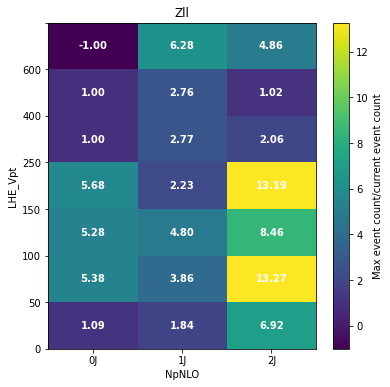

In [146]:
def makePlot(Max,Xbb,title):
    vals = Max["reweighting"].integrate("dataset").values()[()]/Xbb["reweighting"].integrate("dataset").values()[()]
    vals = np.nan_to_num(vals,0)
    vals[vals>1e100] = -1
    print(vals)
    print(vals.shape)
    fig, ax = plt.subplots(1, 1,figsize=(6,6))
    outvals, axx,axy,junk = plt.hist2d(sum([vals.shape[0]*[x] for x in range(vals.shape[1])],[]),vals.shape[1]*list(range(vals.shape[0])),range=[[0,vals.shape[1]],[0,vals.shape[0]]],bins=(vals.shape[1],vals.shape[0]),weights=vals.T.ravel() )
    cbar = plt.colorbar()
    for i in range(len(axy)-1):
        for j in range(len(axx)-1):
            ax.text(axx[j]+0.5,axy[i]+0.5, "{:.2f}".format(outvals.T[i,j]), 
                    color="w", ha="center", va="center", fontweight="bold")

    # plt.axis("off")
    ax.set_xticks((0.5,1.5,2.5))
    ax.set_xticklabels(("0J","1J","2J"))
    ax.set_yticklabels(("0","50","100","150","250","400","600",""))
    plt.xlabel("NpNLO")
    plt.ylabel("LHE_Vpt")
    cbar.ax.set_ylabel("Max event count/current event count")
    plt.title(title)
    plt.savefig(title+"ratio.png",dpi=300)
    return vals

valss = []
for chan in ["Znn","Wln","Zll"]:
    with open("stitchingResults_{}2018Xbb.pickle".format(chan),"rb") as f:
        Xbb = pickle.load(f)

    with open("stitchingResults_{}2018Max.pickle".format(chan),"rb") as f:
        Max = pickle.load(f)    



    valss.append(makePlot(Max,Xbb,chan))

In [135]:
y=valss[2]

In [140]:
y[y>1e100]=0
y

array([[ 1.0940993 ,  1.84346461,  6.91975247],
       [ 5.37968504,  3.8642644 , 13.26699022],
       [ 5.28397566,  4.80359073,  8.46075666],
       [ 5.67816092,  2.22543823, 13.18729872],
       [ 0.99706745,  2.76941922,  2.06061281],
       [ 1.        ,  2.76357691,  1.02227325],
       [ 0.        ,  6.27907451,  4.85791269]])

<AxesSubplot:xlabel='NpNLO', ylabel='LHE_Vpt [GeV]'>

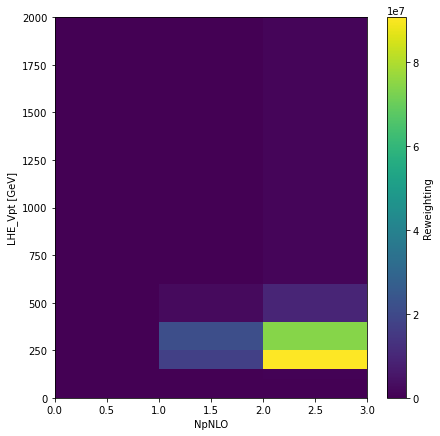

In [31]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(7,7),
    sharex=True
)

hist.plot2d(Max["reweighting"].integrate("dataset"),"NpNLO",ax=ax)
# xs = [0,1,2]
# ys = [0,50,100,150,250,400,600,2000]
# for i,xval in enumerate(xs):
#     for j,yval in enumerate(ys):
#         ax.text(xval,yval,"{:.2f}".format(ratiovals[()][j,i]),color="r")


# plt.yticks(xs)
# plt.xticks(ys)
# for i,xval in enumerate(xs):
#     for j,yval in enumerate(ys):
#         ax.text(xs[i]+.5,ys[j]+.5,"ok")
# for i in range(len(ybins)-1):
#     for j in range(len(xbins)-1):
#         ax.text(xbins[j]+0.5,ybins[i]+.5,hvals.T[i,j],color="w",ha="center",va="center",fonweight="bold")



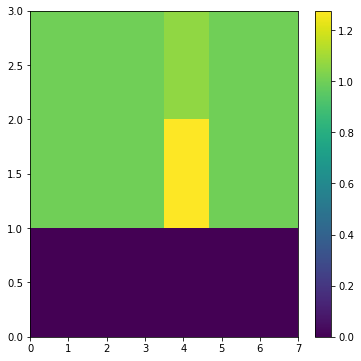

In [18]:
vals

array([[0.        , 0.        , 0.        ],
       [0.        , 1.        , 1.        ],
       [0.        , 1.        , 1.        ],
       [0.        , 1.        , 1.        ],
       [0.        , 1.27551262, 1.06621951],
       [0.        , 1.        , 1.        ],
       [0.        , 1.        , 1.        ]])

In [19]:
outvals

(array([[0.        , 1.        , 1.        ],
        [0.        , 1.        , 1.        ],
        [0.        , 1.        , 1.        ],
        [0.        , 1.27551262, 1.06621951],
        [0.        , 1.        , 1.        ],
        [0.        , 1.        , 1.        ]]),
 array([0.        , 1.16666667, 2.33333333, 3.5       , 4.66666667,
        5.83333333, 7.        ]),
 array([0., 1., 2., 3.]),
 <matplotlib.collections.QuadMesh at 0x7f8bde404190>)